<a href="https://colab.research.google.com/github/Putt2020/pytorch_beginner/blob/main/pytorch_NN_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#Get Data

In [28]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df_import = df.copy()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
# prompt: change df.species from string to integer
species_to_num = {'setosa':0, 'versicolor':1, 'virginica':2}
num_to_species = {v: k for k, v in species_to_num.items()}
df['species'] = df['species'].map(species_to_num)
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


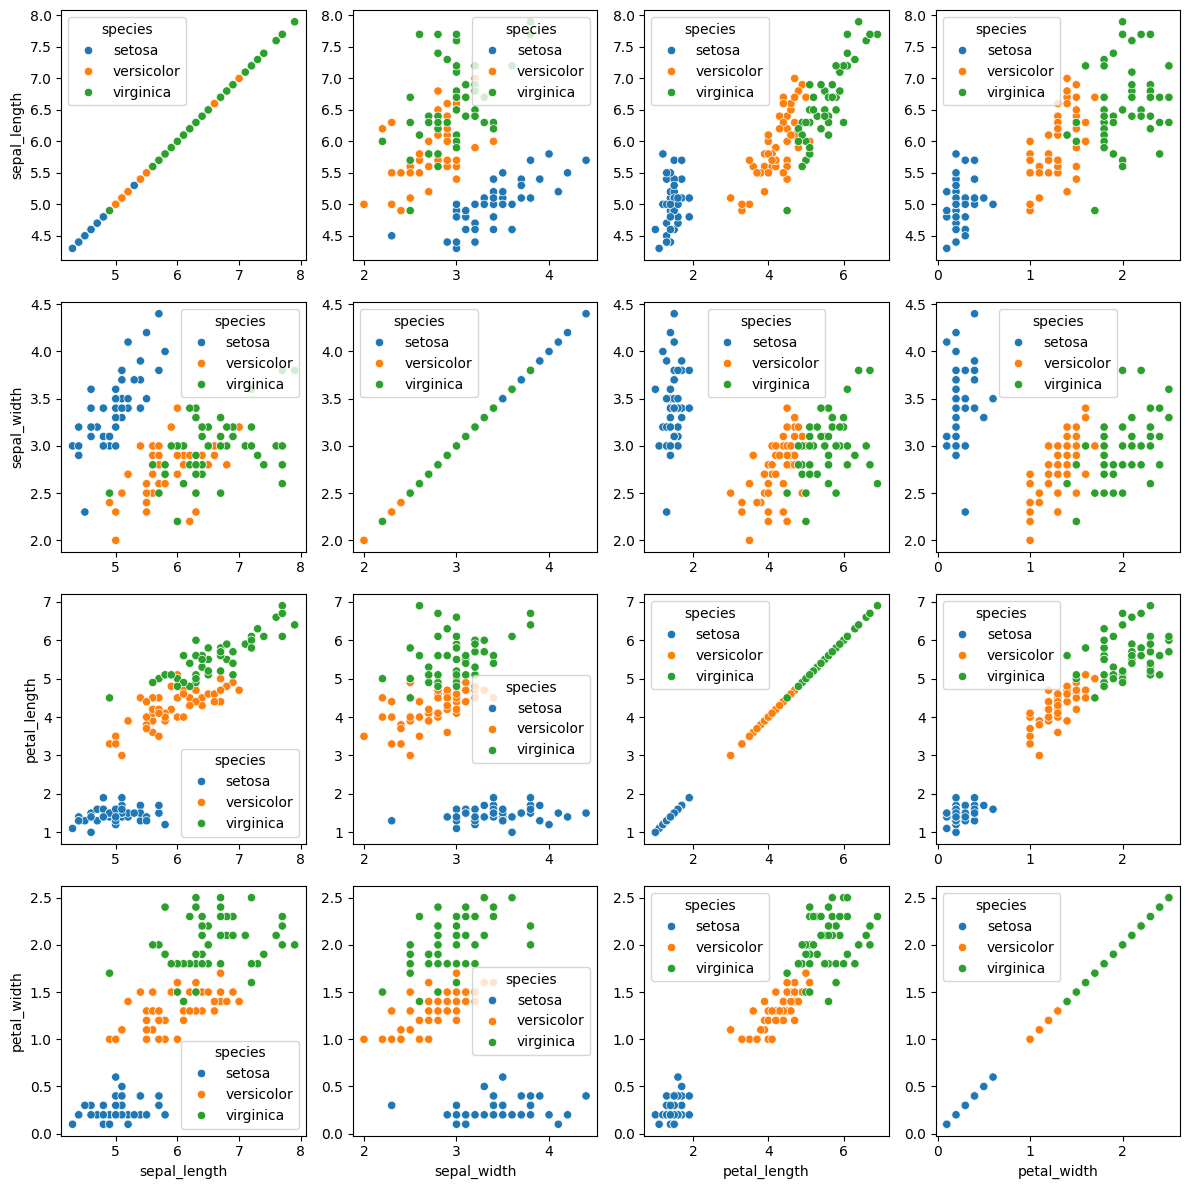

In [30]:
# sns.set_style("darkgrid") # either whitegrid or darkgrid
col_length = df_import.shape[1]-1
fig, axes = plt.subplots(col_length, col_length, figsize=(col_length*3, col_length*3))

columns = df_import.columns[:-1]
for i in range(col_length):
    for j in range(col_length):
        sns.scatterplot(data=df_import, x=columns[i], y=columns[j], hue='species', ax=axes[j, i])

        # Hide the column names if not in the first column or last row
        if j != col_length - 1:
            axes[j, i].set_xlabel('')
        if i != 0:
            axes[j, i].set_ylabel('')

# Show plot
plt.tight_layout()
plt.show()

In [6]:
X = df.drop('species', axis=1).values
y = df['species'].values

In [7]:
# X = X.values
# y = y.values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [9]:
#Convert X to Float and Y to Long
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#Model Part

##Define and train model

In [10]:
#Create a Model class that inherit nn.Module
class Model(nn.Module):
    in_features = 4
    hidden_1 = 12
    hidden_2 = 8
    out_features = 3

    def __init__(self):
        super(Model, self).__init__() #instantiate the model
        self.fc1 = nn.Linear(self.in_features, self.hidden_1)
        self.fc2 = nn.Linear(self.hidden_1, self.hidden_2)
        self.out = nn.Linear(self.hidden_2, self.out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [11]:
torch.manual_seed(41)
model = Model()

In [12]:
# Set criteria of model to measure the error
criteria = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)


In [13]:
#Train model
#Epoch is how many time u want model to run through all data
#Batch size is how much data u want model to read at a training time
epochs = 200
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train) #Go forward and get prediction
    loss = criteria(y_pred, y_train) #Measure error/loss, should be lower each epoch
    losses.append(loss.detach().numpy()) #Tracking loss

    if i % 5 == 4:
        print(f"Epoch {i+1} has loss: {loss}")

    # These process will back propagation weight for fine tune layers
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 5 has loss: 0.9947760701179504
Epoch 10 has loss: 0.9222905039787292
Epoch 15 has loss: 0.8315176367759705
Epoch 20 has loss: 0.7397279739379883
Epoch 25 has loss: 0.6486084461212158
Epoch 30 has loss: 0.5712968707084656
Epoch 35 has loss: 0.5097677111625671
Epoch 40 has loss: 0.4623047113418579
Epoch 45 has loss: 0.42024046182632446
Epoch 50 has loss: 0.37874284386634827
Epoch 55 has loss: 0.3388136923313141
Epoch 60 has loss: 0.299420565366745
Epoch 65 has loss: 0.26019832491874695
Epoch 70 has loss: 0.2218472957611084
Epoch 75 has loss: 0.18655866384506226
Epoch 80 has loss: 0.156013622879982
Epoch 85 has loss: 0.13087722659111023
Epoch 90 has loss: 0.110990010201931
Epoch 95 has loss: 0.09554790705442429
Epoch 100 has loss: 0.08358941972255707
Epoch 105 has loss: 0.07430268079042435
Epoch 110 has loss: 0.06697956472635269
Epoch 115 has loss: 0.061127860099077225
Epoch 120 has loss: 0.056362781673669815
Epoch 125 has loss: 0.052417170256376266
Epoch 130 has loss: 0.04910460859

Text(0.5, 0, 'Epoch')

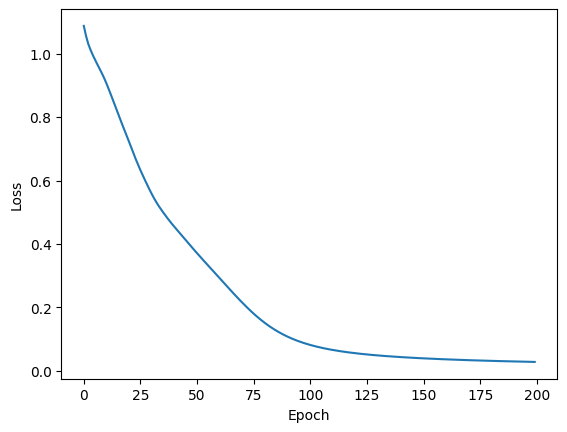

In [14]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

##Eval

In [15]:
# Evaluate Model on Test data
with torch.no_grad(): #Trun off back propagation
    y_pred = model.forward(X_test) #Predict result
    loss = criteria(y_pred, y_test)
print(loss)

tensor(0.1570)


In [16]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        #predict data
        y_val = y_test[i]
        y_hat = model.forward(data)

        #show result
        print(f"{i}\t{y_hat}\t{y_val} or {num_to_species[int(y_val)]}")

        #eval correctness
        if y_hat.argmax().item() == y_val.item():
            correct += 1
print(f"Accuracy: {correct/len(y_test)}")

0	tensor([-6.6369,  4.6274,  8.9204])	2 or virginica
1	tensor([-8.6828,  4.3753, 11.3033])	2 or virginica
2	tensor([-9.6756,  4.8688, 12.6389])	2 or virginica
3	tensor([0.3788, 8.4413, 2.3519])	1 or versicolor
4	tensor([-8.0698,  4.7752, 10.6703])	2 or virginica
5	tensor([ 4.4225, 10.3885, -1.5624])	1 or versicolor
6	tensor([-4.9338,  5.8326,  7.4556])	2 or virginica
7	tensor([0.9444, 8.6773, 1.8122])	1 or versicolor
8	tensor([-6.4667,  5.3179,  9.0399])	2 or virginica
9	tensor([-9.1700,  4.6066, 11.9593])	2 or virginica
10	tensor([-4.4475,  5.9582,  6.9561])	2 or virginica
11	tensor([ 28.1275,  21.4828, -24.5694])	0 or setosa
12	tensor([ 25.4006,  19.3113, -22.2917])	0 or setosa
13	tensor([ 5.3867,  9.6751, -2.9838])	1 or versicolor
14	tensor([ 24.2800,  19.4784, -20.9134])	0 or setosa
15	tensor([-3.8590,  6.4808,  6.4683])	2 or virginica
16	tensor([ 25.1558,  19.6308, -21.8789])	0 or setosa
17	tensor([-6.0220,  5.0550,  8.4029])	1 or versicolor
18	tensor([ 26.8941,  20.6138, -23.5015

In [17]:
#Save Model
torch.save(model.state_dict(), 'iris_model.pt')

In [18]:
#Load Model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

##Try predict incoming data

In [31]:
new_iris1 = torch.tensor([4.7, 3.2, 1.3, 0.7])
new_iris2 = torch.tensor([6.2, 3.4, 5.4, 2.3])

In [32]:
with torch.no_grad():
    pred1 = model.forward(new_iris1)
    pred2 = model.forward(new_iris2)
print(pred1, num_to_species[pred1.argmax().item()])
print(pred2, num_to_species[int(pred2.argmax())])

tensor([ 23.8445,  18.7650, -20.6920]) setosa
tensor([-8.3481,  4.2164, 10.8526]) virginica


#ONNX

In [33]:
!pip install onnxruntime
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 67.4 MB/s eta 0:00:00


In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [46]:
torch.onnx.export(model,                                # model being run
                  torch.tensor([4.7, 3.2, 1.3, 0.7]).to(device),    # model input (or a tuple for multiple inputs)
                  "iris_model.onnx",                    # where to save the model (can be a file or file-like object)
                  input_names = ['input'],              # the model's input names
                  output_names = ['output'])            # the model's output names

In [45]:
import onnxruntime as ort
import numpy as np
x, y = X_test[0], y_test[0]
# classes = ['setosa', 'versicolor', 'virginica']

# Load the ONNX model
ort_sess = ort.InferenceSession('iris_model.onnx')
outputs = ort_sess.run(None, {'input': x.numpy()})

# Print Result
print(f"output: {outputs[0]}")
predicted, actual = num_to_species[outputs[0].argmax(0)], num_to_species[y.item()]
print(f'Predicted: "{predicted}", Actual: "{actual}"')

output: [-6.6368833  4.627439   8.920447 ]
Predicted: "virginica", Actual: "virginica"
